In [1]:
import sys; sys.path.insert(0, "..")
import music21
from music21.note import Note
from AugmentedNet.common import ANNOTATIONSCOREDUPLES
import seaborn as sns
import matplotlib.pyplot as plt
from AugmentedNet.annotation_parser import parseAnnotation
from AugmentedNet.score_parser import parseScore
import pandas as pd
pd.set_option('display.max_rows', 6000)

In [2]:
def getAnnotationOffsets(a):
    annotationIndexes = a[a.a_isOnset].a_pitchNames.index.to_list()
    annotationNotes = a[a.a_isOnset].a_pitchNames.to_list()
    annotationText = a[a.a_isOnset].a_romanNumeral.to_list()
    annotationIndexes.append('end')
    annotationRanges = [(annotationIndexes[i], annotationIndexes[i+1], annotationNotes[i], annotationText[i]) for i in range(len(annotationNotes))]
    return annotationRanges

def getNonChordSequence(annotationRanges, s):
    ret = []
    for start, end, annotationNotes, _ in annotationRanges:
#         print(start, end)
        if end == "end":
            slices = s[start:]
        else:
            slices = s[start:end].iloc[:-1]
        originalNotes = slices.s_notes.to_list()
        originalNoteNames = [Note(n).name for chord in originalNotes for n in chord]
        nonChordTones = set(originalNoteNames) - set(annotationNotes)
        missingNotes = set(annotationNotes) - set(originalNoteNames)
        originalNonChord = [n for n in originalNoteNames if n in nonChordTones]
        if not originalNotes:
            missingNotesFactor = 1.0
            nonChordToneFactor = 1.0
        else:
            missingNotesRatio = len(missingNotes) / len(set(annotationNotes))
            nonChordToneRatio = len(originalNonChord) / len(originalNoteNames)
#         print('original notes:', originalNoteNames)
#         print('notes implied by annotation:', annotationNotes)
#         print('potential non-chord tones:', originalNonChord)
#         print('missing notes from annotation:', missingNotesFactor)
#         print(start, end, annotationNotes, nonChordToneFactor)
        ret.append((originalNoteNames, nonChordToneRatio, missingNotesRatio))
    return ret

In [12]:
f = "bps-01-op002-no1-1"
_aPath, _sPath = ANNOTATIONSCOREDUPLES[f]
aPath = f"../{_aPath}"
sPath = f"../{_sPath}"

In [13]:
aScore = music21.converter.parse(aPath, format="romantext")
# sScore = music21.converter.parse(sPath).chordify().show("musicxml")

In [14]:
a = parseAnnotation(aPath)
s = parseScore(sPath)
annotationRanges = getAnnotationOffsets(a)
scoreMetrics = getNonChordSequence(annotationRanges, s)

In [15]:
qualitydfdict = {
    "start": [],
    "end": [],
    "romanNumeral": [],
    "annotationPitchNames": [],
    "scorePitchNames": [],
    "nonChordRatio": [],
    "missingNotesRatio": []
}

for i in range(len(annotationRanges)):
    start, end, annotationPitchNames, romanNumeral = annotationRanges[i]
    scorePitchNames, nonChordRatio, missingNotesRatio = scoreMetrics[i]
    qualitydfdict["start"].append(start)
    qualitydfdict["end"].append(end)
    qualitydfdict["romanNumeral"].append(romanNumeral)
    qualitydfdict["annotationPitchNames"].append(annotationPitchNames)
    qualitydfdict["scorePitchNames"].append(scorePitchNames)
    qualitydfdict["nonChordRatio"].append(nonChordRatio)
    qualitydfdict["missingNotesRatio"].append(missingNotesRatio)

In [16]:
qualitydf = pd.DataFrame(qualitydfdict)

In [17]:
qualitydf

,start,end,romanNumeral,annotationPitchNames,scorePitchNames,nonChordRatio,missingNotesRatio
0,0.0,1.0,i,"(F, A-, C)","[C, C, C, C, C, C, C, C]",0.000000,0.666667
1,1.0,5.0,i,"(F, A-, C)","[F, F, F, F, F, F, F, F, A-, A-, A-, A-, A-, A...",0.000000,0.000000
2,5.0,9.0,i,"(F, A-, C)","[A-, A-, A-, A-, A-, A-, A-, A-, F, A-, C, A-,...",0.031250,0.000000
3,9.0,13.0,V7,"(E, G, B-, C)","[E, G, B-, C, G, E, G, B-, C, G, E, G, B-, C, ...",0.000000,0.000000
4,13.0,17.0,V7,"(E, G, B-, C)","[B-, B-, B-, B-, B-, B-, B-, B-, E, G, B-, C, ...",0.025000,0.000000
5,17.0,21.0,i,"(F, A-, C)","[C, A-, C, A-, C, A-, C, A-, C, A-, C, A-, C, ...",0.028846,0.000000
6,21.0,25.0,V7,"(G, B-, C, E)","[C, B-, C, B-, C, B-, C, B-, C, B-, C, B-, C, ...",0.028846,0.000000
7,25.0,27.0,i,"(A-, C, F)","[C, F, A-, C, C, F, A-, C, C, F, A-, C, C, F, ...",0.000000,0.000000
8,27.0,29.0,iio,"(B-, D-, G)","[B-, B-, B-, B-, A-, A-, A-, A-, B-, D-, G, G,...",0.200000,0.000000
9,29.0,32.0,V,"(C, E, G)","[E, F, G, E, F, G, E, F, G, E, F, G, E, F, G, ...",0.111111,0.000000


26.544636774707964 29.916666666666664 39.64016204240208
Top problematic annotations:


,start,end,romanNumeral,annotationPitchNames,scorePitchNames,nonChordRatio,missingNotesRatio,score
26,80.0,81.0,V7,"(E-, G, B-, D-)","[E-, F-, E-, F-, E-, F-, E-, F-, E-, F-, E-, F...",0.500000,0.750000,1.5625
30,88.0,89.0,V7,"(E-, G, B-, D-)","[E-, F-, E-, F-, E-, F-, E-, F-, E-, F-, E-, F...",0.500000,0.750000,1.5625
34,96.0,97.0,V7,"(E-, G, B-, D-)","[E-, F-, E-, F-, E-, F-, E-, F-, E-, F-, E-, F...",0.500000,0.750000,1.5625
81,220.0,221.0,V7,"(F, A, C, E-)","[F, G-, F, G-, F, G-, F, G-, F, G-, F, G-, F, ...",0.500000,0.750000,1.5625
85,228.0,229.0,V7,"(F, A, C, E-)","[F, G-, F, G-, F, G-, F, G-, F, G-, F, G-, F, ...",0.500000,0.750000,1.5625
89,236.0,237.0,V7,"(F, A, C, E-)","[F, G-, F, G-, F, G-, F, G-, F, G-, F, G-, F, ...",0.500000,0.750000,1.5625
96,252.0,253.0,V7,"(G, B, D, F)","[G, A-, G, A-, G, A-, G, A-, G, A-, G, A-, G, ...",0.500000,0.750000,1.5625
100,260.0,261.0,V7,"(G, B, D, F)","[G, A-, G, A-, G, A-, G, A-, G, A-, G, A-, G, ...",0.500000,0.750000,1.5625
104,268.0,269.0,V7,"(G, B, D, F)","[A-, F, A-, F, A-, F, A-, F, A-, D, A-, D, A-,...",0.500000,0.500000,1.0000
108,276.0,277.0,V7,"(F, A, C, E-)","[G-, E-, G-, E-, G-, E-, G-, E-, G-, C, G-, C,...",0.500000,0.500000,1.0000


(0.0, 4.0)

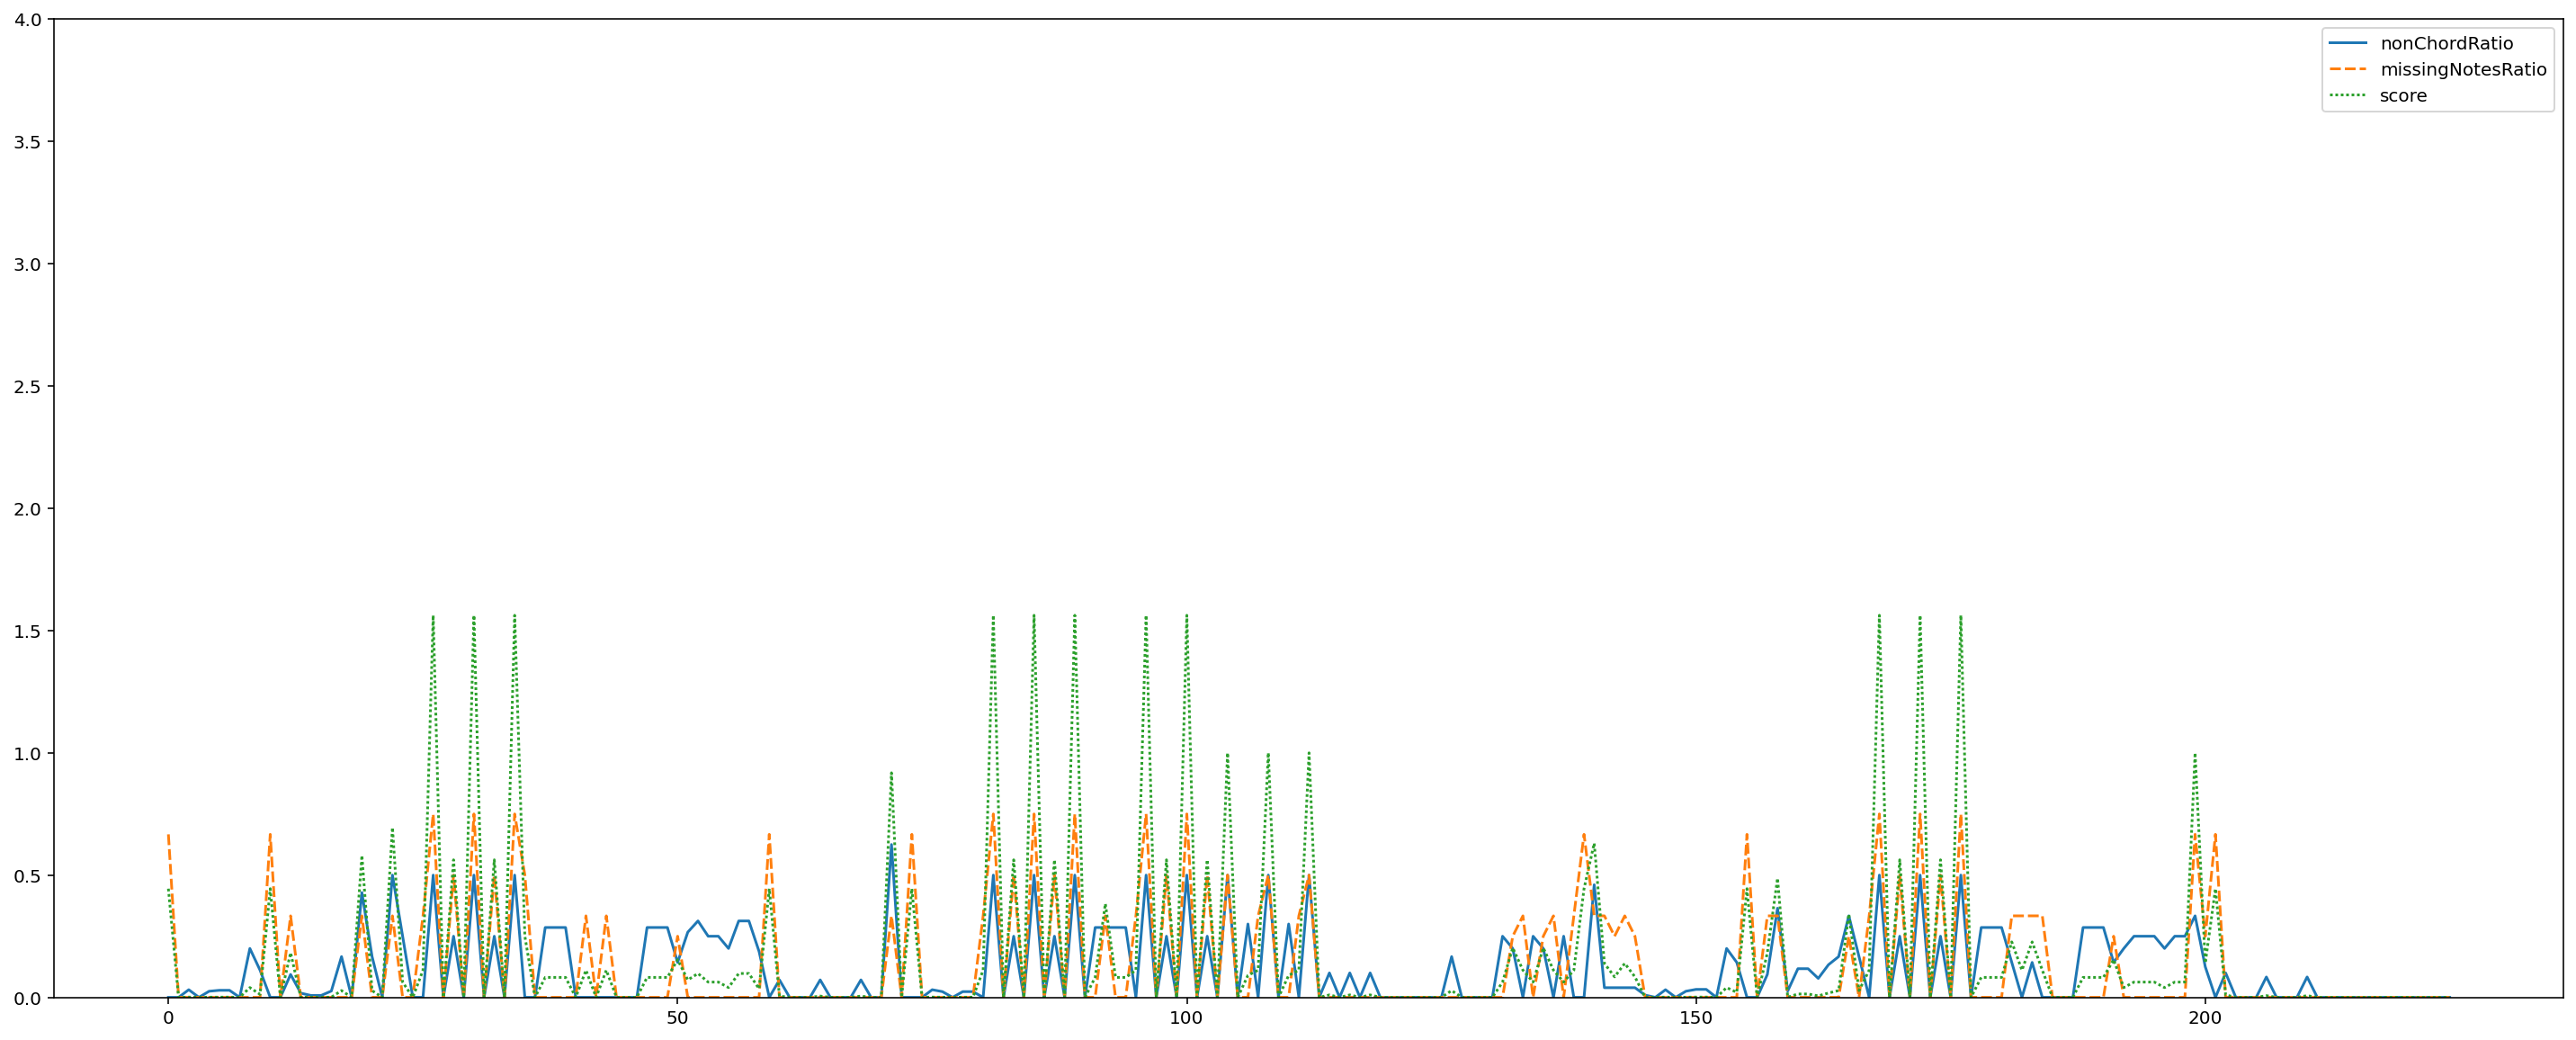

In [18]:
qualitydf["score"] = (qualitydf.nonChordRatio + qualitydf.missingNotesRatio)**2
print(qualitydf.nonChordRatio.sum(), qualitydf.missingNotesRatio.sum(), qualitydf.score.sum())
print("Top problematic annotations:")
display(qualitydf[qualitydf.score >= 1.0])
plt.figure(figsize=(25, 10))
sns.lineplot(data=qualitydf[["nonChordRatio", "missingNotesRatio", "score"]])
plt.ylim(0, 4)

<AxesSubplot:xlabel='romanNumeral', ylabel='score'>

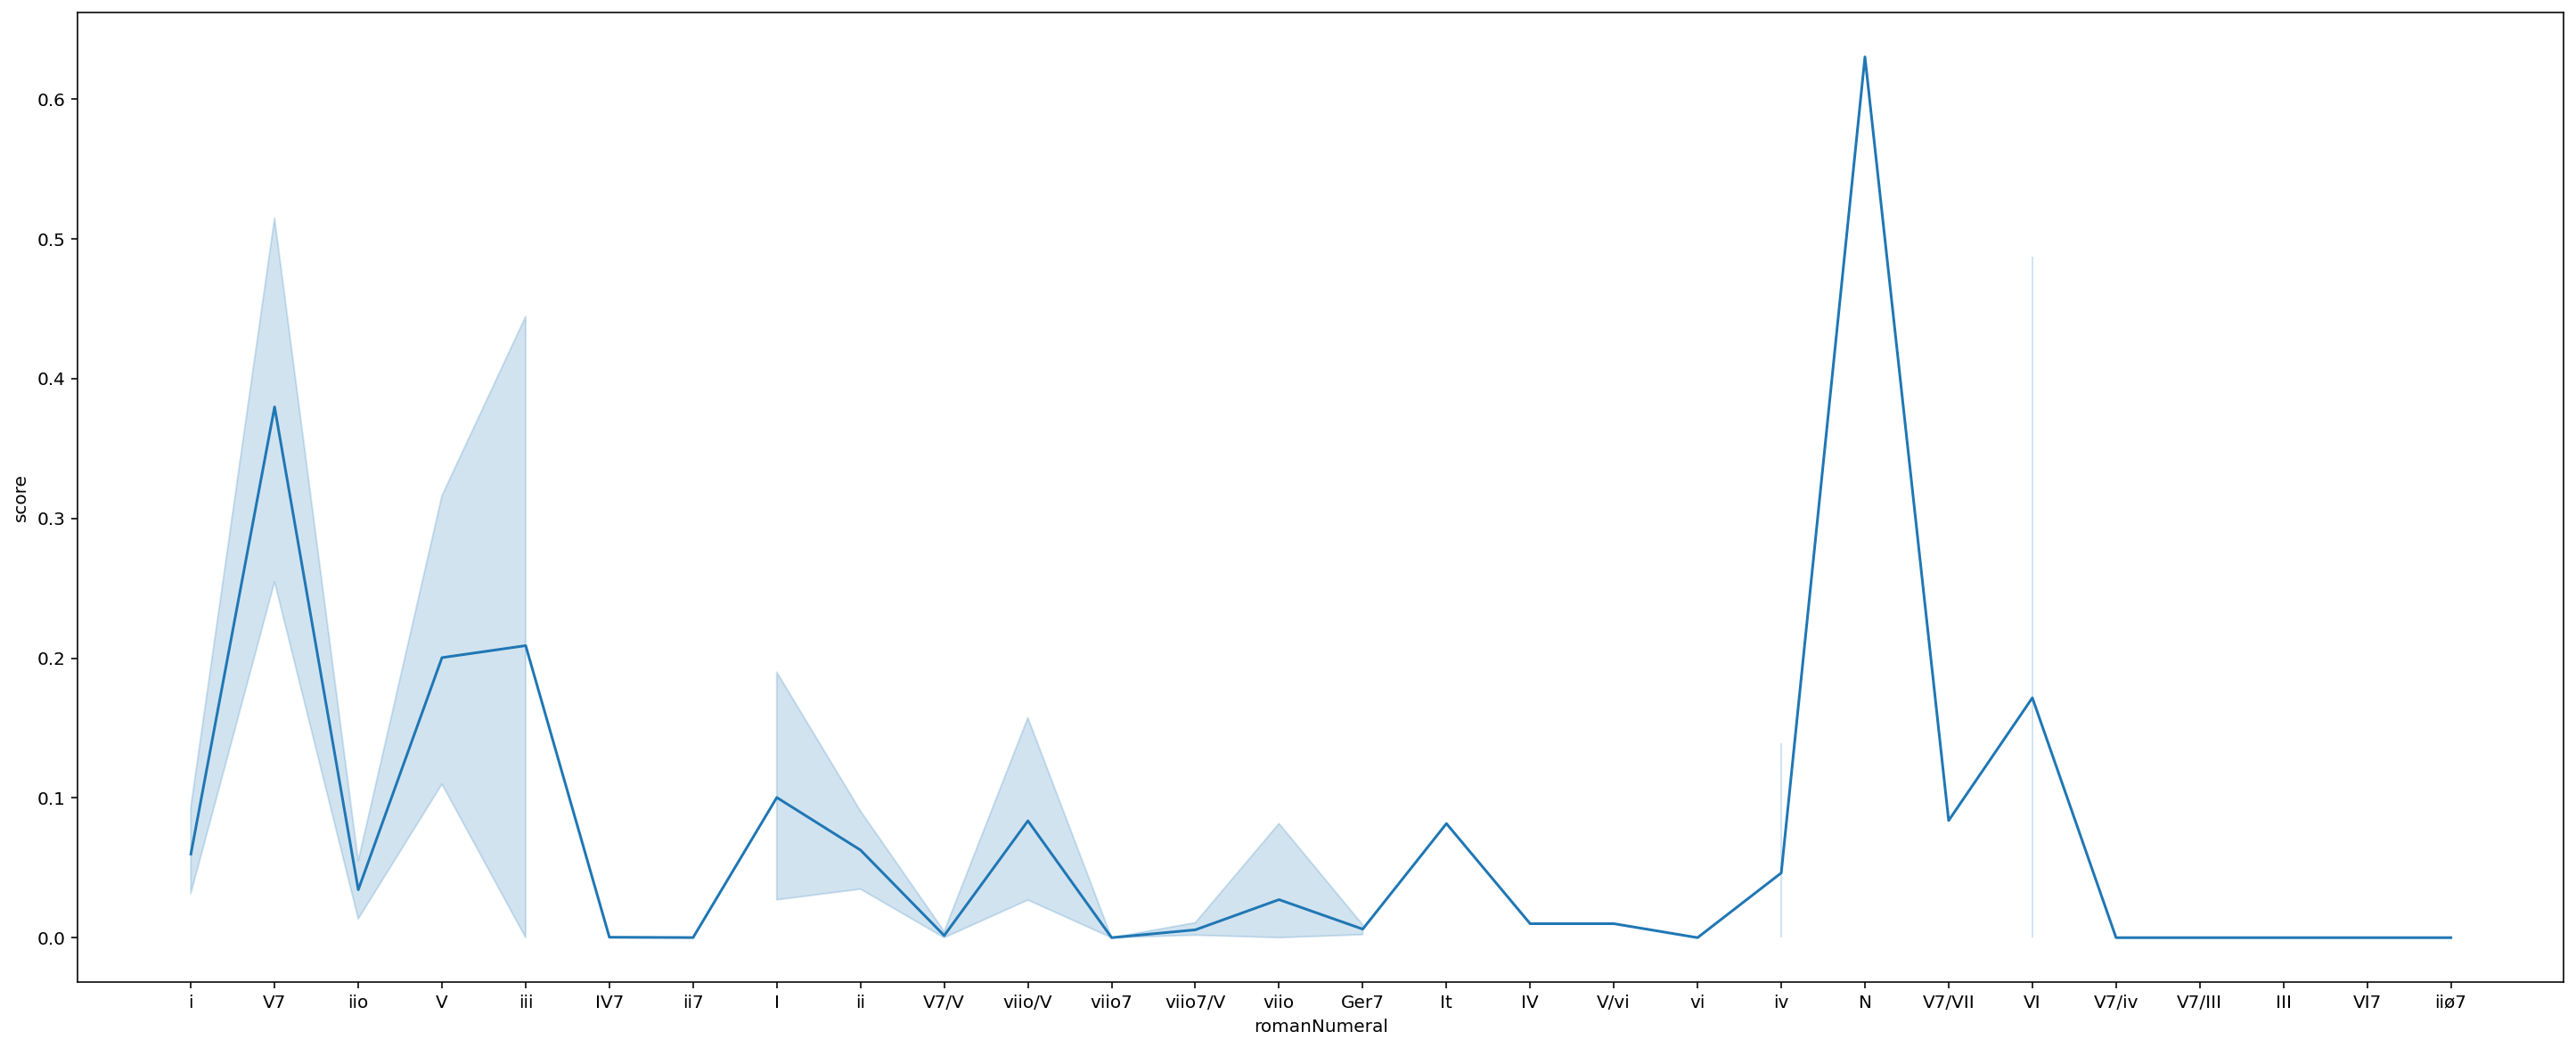

In [19]:
plt.figure(figsize=(25, 10))
sns.lineplot(data=qualitydf, x="romanNumeral", y="score")